In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
import numpy as np

In [6]:
reactor_data_w_time = pd.read_csv('/content/drive/MyDrive/polymer_reactor.txt')

##Data Analysis

In [7]:
reactor_data_w_time.iloc[2100:]

,Unnamed: 0,513FC31103.pv,513HC31114-5.mv,513PC31201.pv,513LC31202.pv,513FC31409.pv,513FC31114-5.pv,513TC31220.pv,MFR
2100,10/29/2018 11:45,21669.730,0.180,30.892557,76.715584,26112.104,0.110203,80.136581,14.3
2101,10/29/2018 13:45,21104.066,0.179,30.943935,77.123138,29730.547,0.097483,79.830345,13.8
2102,10/29/2018 15:45,20772.168,0.179,31.103821,76.768845,30804.184,0.098374,79.598404,13.5
2103,10/29/2018 17:45,21072.043,0.179,30.873522,76.974831,30674.375,0.085419,79.773842,13.6
2104,10/29/2018 19:45,20988.229,0.179,31.012695,77.105034,28458.432,0.085877,79.899765,13.2
...,...,...,...,...,...,...,...,...,...
2559,12-10-18 9:45,24437.988,0.185,31.025928,77.189499,24022.730,0.103966,81.783371,12.3
2560,12/17/2018 16:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5
2561,12/17/2018 18:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
2562,12/27/2018 5:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.7


In [8]:
#use labels instead of data file tags
reactor_data_w_time = reactor_data_w_time.rename(columns={'Unnamed: 0': 'Time', '513FC31103.pv': 'C3', '513HC31114-5.mv': 'H2R', '513PC31201.pv': 'Pressure', '513LC31202.pv': 'Level', '513FC31409.pv': 'C2', '513FC31114-5.pv': 'Cat', '513TC31220.pv': 'Temp'})

In [9]:
reactor_data_w_time = reactor_data_w_time.dropna()

In [10]:
reactor_data_w_time.isnull().values.any()

False

In [11]:
#drop the time the data point was taken
reactor_data = reactor_data_w_time.drop('Time', axis=1 )

In [12]:
reactor_data.head()

,C3,H2R,Pressure,Level,C2,Cat,Temp,MFR
0,24856.584,0.153,30.414835,79.657906,50850.578,0.163994,80.399605,3.4
1,25537.250,0.153,30.527121,78.532608,42229.813,0.129739,78.861328,3.2
2,25689.266,0.153,30.356180,78.842636,45335.852,0.150003,78.818115,3.2
3,25098.754,0.153,30.894308,79.173500,43077.016,0.151543,79.022720,3.1
4,24853.941,0.150,30.680647,78.677299,40404.387,0.122582,79.038483,3.3


In [13]:
reactor_data.shape

(2484, 8)

In [14]:
reactor_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2484 entries, 0 to 2559
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   C3        2484 non-null   float64
 1   H2R       2484 non-null   float64
 2   Pressure  2484 non-null   float64
 3   Level     2484 non-null   float64
 4   C2        2484 non-null   float64
 5   Cat       2484 non-null   float64
 6   Temp      2484 non-null   float64
 7   MFR       2484 non-null   float64
dtypes: float64(8)
memory usage: 174.7 KB


In [15]:
np.corrcoef(reactor_data['C3'],reactor_data['H2R'])

array([[ 1.        , -0.03583256],
       [-0.03583256,  1.        ]])

In [16]:
for col1 in reactor_data:
  for col2 in reactor_data:
    print(col1, col2)
    print(np.corrcoef(reactor_data_w_time[col1],reactor_data_w_time[col2]))

C3 C3
[[1. 1.]
 [1. 1.]]
C3 H2R
[[ 1.         -0.03583256]
 [-0.03583256  1.        ]]
C3 Pressure
[[ 1.         -0.24638226]
 [-0.24638226  1.        ]]
C3 Level
[[1.         0.20758953]
 [0.20758953 1.        ]]
C3 C2
[[1.         0.38742925]
 [0.38742925 1.        ]]
C3 Cat
[[1.        0.2799678]
 [0.2799678 1.       ]]
C3 Temp
[[ 1.         -0.15759101]
 [-0.15759101  1.        ]]
C3 MFR
[[ 1.         -0.24798446]
 [-0.24798446  1.        ]]
H2R C3
[[ 1.         -0.03583256]
 [-0.03583256  1.        ]]
H2R H2R
[[1. 1.]
 [1. 1.]]
H2R Pressure
[[1.         0.22157601]
 [0.22157601 1.        ]]
H2R Level
[[1.        0.1044359]
 [0.1044359 1.       ]]
H2R C2
[[1.         0.37574455]
 [0.37574455 1.        ]]
H2R Cat
[[1.         0.22691946]
 [0.22691946 1.        ]]
H2R Temp
[[1.         0.05296717]
 [0.05296717 1.        ]]
H2R MFR
[[1.         0.42643292]
 [0.42643292 1.        ]]
Pressure C3
[[ 1.         -0.24638226]
 [-0.24638226  1.        ]]
Pressure H2R
[[1.         0.22157601]

In [17]:
for col in reactor_data:
  print(col)
  print(np.median(reactor_data[col]))

C3
25364.311500000003
H2R
0.175
Pressure
30.622631
Level
77.4944765
C2
41550.5625
Cat
0.1329714105
Temp
80.0443075
MFR
4.3


In [18]:
reactor_data_w_time['Time'] = pd.to_datetime(reactor_data_w_time['Time'])

In [19]:
reactor_data_w_time['Time'][0]

Timestamp('2018-04-05 19:45:00')

In [20]:
def _range(series):
    return series.max() - series.min()
range_value = reactor_data_w_time['Time'].agg([_range])
range_value

_range   248 days 14:00:00
Name: Time, dtype: timedelta64[ns]

In [21]:
pd.to_datetime('04-05-18')

Timestamp('2018-04-05 00:00:00')

In [22]:
first_month = reactor_data_w_time['Time'] <= pd.to_datetime('04-30-18 23:45:00')


In [23]:
reactor_first_month = reactor_data_w_time[first_month]
np.median(reactor_first_month['MFR'])

4.2

In [24]:
last_month =  reactor_data_w_time['Time'] <= pd.to_datetime('12-10-2018 09:45:00')

In [25]:
reactor_last_month = reactor_data_w_time[last_month]
np.median(reactor_last_month['MFR'])

4.3

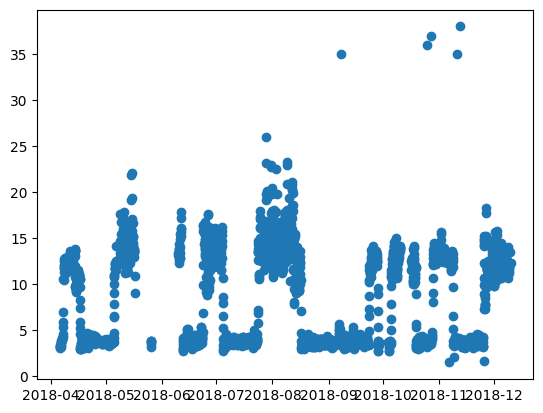

In [26]:
import matplotlib.pyplot as plt
plt.scatter(reactor_data_w_time['Time'], reactor_data_w_time['MFR'])

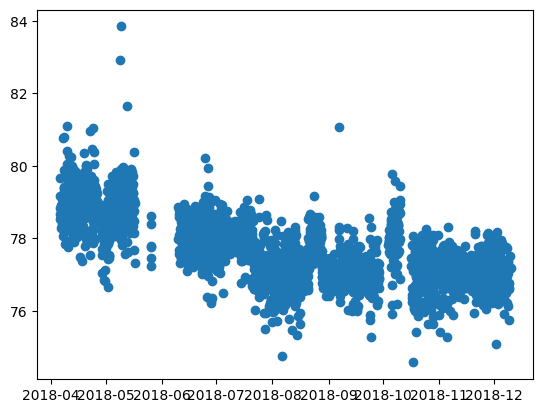

In [27]:

plt.scatter(reactor_data_w_time['Time'], reactor_data_w_time['Level'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7cbb191f8b50>,
 'caps': [<matplotlib.lines.Line2D at 0x7cbb191f9090>,
 'boxes': [<matplotlib.lines.Line2D at 0x7cbb191f88b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7cbb191f95d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7cbb191f9870>],
 'means': []}

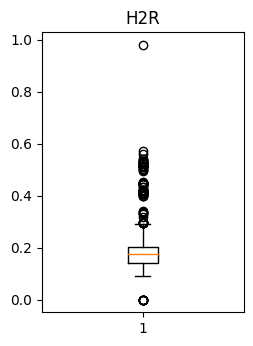

In [28]:

plt.figure(figsize=(12,8))
plt.subplot(2,4,+1)
plt.title('H2R')
plt.boxplot(reactor_data['H2R'])

In [29]:
# import seaborn as sns
# sns.pairplot(reactor_data_w_time)

In [30]:
print(len(reactor_data))
reactor_data = reactor_data[reactor_data['H2R']<0.7]
reactor_data = reactor_data[reactor_data['H2R']>0.01]
reactor_data = reactor_data[reactor_data['C2']<100000]
reactor_data = reactor_data[reactor_data['MFR']<30]
reactor_data = reactor_data[reactor_data['Temp']<83]
print(len(reactor_data))
reactor_data.head()

2484
2450


,C3,H2R,Pressure,Level,C2,Cat,Temp,MFR
0,24856.584,0.153,30.414835,79.657906,50850.578,0.163994,80.399605,3.4
1,25537.250,0.153,30.527121,78.532608,42229.813,0.129739,78.861328,3.2
2,25689.266,0.153,30.356180,78.842636,45335.852,0.150003,78.818115,3.2
3,25098.754,0.153,30.894308,79.173500,43077.016,0.151543,79.022720,3.1
4,24853.941,0.150,30.680647,78.677299,40404.387,0.122582,79.038483,3.3


In [31]:
reactor_data['lnMFR'] = np.log(reactor_data['MFR'].values)

In [32]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
data = s.fit_transform(reactor_data)
type(reactor_data)

pandas.core.frame.DataFrame

The value `ds` is returned as a `numpy` array so we need to convert it back to a `pandas` `DataFrame`.

```python
ds = pd.DataFrame(ds,columns=data.columns)
```

Re-use the column names from `data`.

In [33]:
reactor_data = pd.DataFrame(data,columns=reactor_data.columns)
reactor_data.head()

,C3,H2R,Pressure,Level,C2,Cat,Temp,MFR,lnMFR
0,-0.275813,-0.448905,-0.608709,2.183673,0.738905,0.618674,0.393138,-0.927809,-1.032139
1,0.127196,-0.448905,-0.337724,0.958317,-0.026235,-0.206091,-1.736289,-0.968421,-1.128004
2,0.217202,-0.448905,-0.750264,1.295911,0.249443,0.281795,-1.796108,-0.968421,-1.128004
3,-0.132429,-0.448905,0.548427,1.656195,0.048959,0.318882,-1.512875,-0.988728,-1.178208
4,-0.277378,-0.491991,0.032788,1.115873,-0.188252,-0.378416,-1.491054,-0.948115,-1.079345


In [34]:

reactor_data = reactor_data.sample(frac = 1)

##Neural Network

In [35]:
target = np.array(reactor_data['lnMFR'])

In [36]:
reactor_data.drop(['MFR', 'lnMFR'], axis = 1)

,C3,H2R,Pressure,Level,C2,Cat,Temp
786,1.975919,0.125570,-0.219438,0.436563,1.514126,0.722059,-0.381272
1383,-2.377480,-0.061135,0.085525,-0.213454,-0.517450,0.202218,-0.201453
2343,-0.577639,-0.721781,1.971444,-1.008276,-0.976138,-1.538819,-1.334092
435,0.083109,0.455893,0.918521,1.664270,1.177186,-0.036011,-0.685056
1994,-1.978774,-0.061135,0.896555,-1.035102,-0.921613,-0.504959,0.095952
...,...,...,...,...,...,...,...
1279,-1.084782,1.662289,1.001924,-2.197626,-1.816139,-0.342448,-1.684349
467,1.447979,-0.563800,-0.274289,-0.451879,-0.535074,0.991373,-1.883407
2292,0.148678,-0.894123,0.915620,-0.612003,-1.127992,-1.036237,1.517970
1004,-1.720146,0.786215,1.826886,-0.464739,0.905348,0.115530,0.309070


In [37]:
from sklearn.model_selection import train_test_split
X_train_full, X_test, y_train_full, y_test = train_test_split(reactor_data, target, test_size = 1/5, shuffle=False)
X_train_tr, X_train_v, y_train_tr, y_train_v = train_test_split(X_train_full,
                                                                y_train_full,
                                                                test_size = 1/4, shuffle=False)


In [35]:
import keras
import tensorflow as tf

In [36]:
!pip install -q -U keras-tuner
import keras_tuner as kt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.0 MB/s eta 0:00:00


In [37]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [38]:
def build_model(hp):
  model = keras.Sequential()
  model.add(keras.layers.Dense(
      hp.Int('unit[0]',21, 100, step = 10), activation = 'linear')
  )
  model.add(keras.layers.Dense(
      hp.Int('unit[1]', 23, 100, step = 10), activation = 'relu')
  )
  model.add(keras.layers.Dense(
      hp.Int('unit[2]', 23, 100, step = 10), activation = 'relu')
  )


  model.add(keras.layers.Dense(1,activation='linear'))
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3])
  model.compile(loss='mse',
                optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),metrics="mean_squared_error")
  return model

In [39]:
tuner = kt.Hyperband(build_model, objective='mean_squared_error', overwrite=True)

In [40]:
import time
#Starting Timer
t0 = time.time()

In [41]:
tuner.search(X_train_tr, y_train_tr, epochs=40,validation_data=(X_train_v,y_train_v),
             callbacks=[keras.callbacks.EarlyStopping(patience=15)])

Trial 254 Complete [00h 00m 19s]
mean_squared_error: 3.1770985515322536e-05

Best mean_squared_error So Far: 1.1868049114127643e-05
Total elapsed time: 00h 21m 50s


In [42]:

#Stopping Timer
t1 = time.time()
#Printing Execution Time for fit
total = t1-t0
time_taken =  " The total time taken to run is: " + str(total) + " seconds"
print(time_taken)

 The total time taken to run is: 1309.8732295036316 seconds


In [43]:
best_hps = tuner.get_best_hyperparameters()
best_hps

In [58]:
hyper_model = tuner.hypermodel.build(best_hps[0])
hyper_model

In [64]:

hyper_model.save('/content/drive/My Drive/model_{}.keras'.format(1))

In [65]:
hyper_model.fit(X_train_tr, y_train_tr, epochs =50, validation_data=(X_train_v, y_train_v), callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/50
46/46 [==============================] - 1s 8ms/step - loss: 0.1127 - mean_squared_error: 0.1127 - val_loss: 0.0153 - val_mean_squared_error: 0.0153
Epoch 2/50
46/46 [==============================] - 0s 4ms/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0090 - val_mean_squared_error: 0.0090
Epoch 3/50
46/46 [==============================] - 0s 5ms/step - loss: 0.0058 - mean_squared_error: 0.0058 - val_loss: 0.0017 - val_mean_squared_error: 0.0017
Epoch 4/50
46/46 [==============================] - 0s 4ms/step - loss: 8.9045e-04 - mean_squared_error: 8.9045e-04 - val_loss: 0.0011 - val_mean_squared_error: 0.0011
Epoch 5/50
46/46 [==============================] - 0s 4ms/step - loss: 6.4506e-04 - mean_squared_error: 6.4506e-04 - val_loss: 6.2569e-04 - val_mean_squared_error: 6.2569e-04
Epoch 6/50
46/46 [==============================] - 0s 4ms/step - loss: 4.0023e-04 - mean_squared_error: 4.0023e-04 - val_loss: 5.9444e-04 - val_mean_squared_error: 5.9444e-04


In [66]:
hyper_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 21)                210       
                                                                 
 dense_9 (Dense)             (None, 83)                1826      
                                                                 
 dense_10 (Dense)            (None, 53)                4452      
                                                                 
 dense_11 (Dense)            (None, 1)                 54        
                                                                 
Total params: 6542 (25.55 KB)
Trainable params: 6542 (25.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


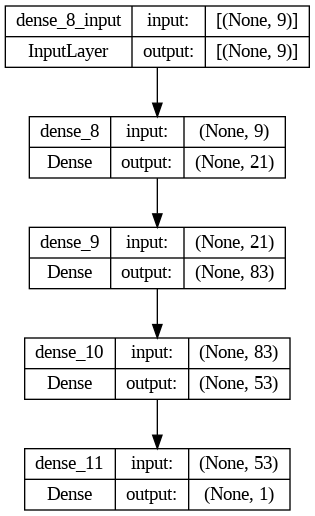

In [67]:
dot_img_file = '/tmp/model_1.png'
keras.utils.plot_model(hyper_model, to_file=dot_img_file, show_shapes=True)

In [68]:
hyper_model.evaluate(X_test,y_test)

16/16 [==============================] - 0s 8ms/step - loss: 1.2764e-04 - mean_squared_error: 1.2764e-04


[0.00012763583799824119, 0.00012763583799824119]

In [69]:
prediction = hyper_model.predict([X_test])

16/16 [==============================] - 1s 18ms/step


In [70]:
from sklearn.metrics import r2_score
r2_score(y_test, prediction)

0.9998740473389027

In [61]:
print(X_test)


            C3       H2R  Pressure     Level        C2       Cat      Temp  \
1494  0.087573  0.168655 -0.632432 -0.987282 -0.682758 -0.019470 -0.699663   
1759  0.227208 -0.707419 -1.111178 -0.533760 -0.157211 -0.128966  0.819762   
2311 -0.558389 -0.922847  0.534145 -0.543273 -0.234239 -1.215863  0.112608   
2054 -2.026918 -0.233477  0.479016 -1.459837 -1.994886 -0.762384 -0.734463   
469   2.044872  0.656959 -0.243673  0.357889  2.047001  0.463943  0.137523   
...        ...       ...       ...       ...       ...       ...       ...   
575   1.307844 -0.563800 -0.883896  0.180650  0.167518  0.933323 -0.102759   
1314 -0.674272  0.226103 -0.718087 -0.262985 -0.197741  0.414989  0.102575   
106  -0.044851 -0.247839 -0.682970  1.026930  0.343685 -0.704025 -1.776537   
1042  0.144858  1.030367  0.339382 -0.535032  0.867729  0.427929  0.016130   
1836 -0.725522 -0.003687  0.546433  1.427681  0.385073 -0.816335  2.267899   

           MFR     lnMFR  
1494 -0.866891 -0.898429  
1759 -0.8

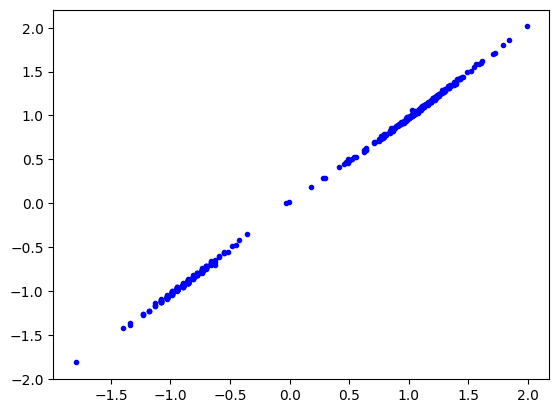

In [62]:
plt.plot(y_test, prediction ,'b.')

In [63]:
time = []
num = 0
for date in reactor_data_w_time['Time']:
  if num %5 == 0:
    time.append(date)
  num+=1

In [64]:
time = time[:-7]

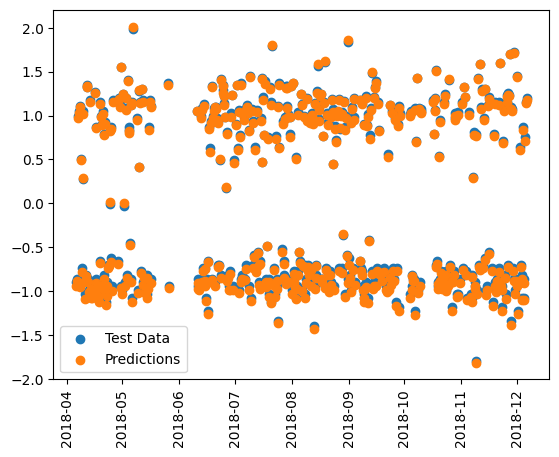

In [65]:
plt.xticks(rotation=90)
plt.scatter(x=time, y=y_test)
plt.scatter(x=time, y=prediction)
classes = ['Test Data', 'Predictions']
plt.legend(labels=classes)
plt.show()

##TPOT

In [71]:
!pip install tpot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11938 sha256=98369f1ce0c71b2124690b6911d8a2d0dc12bf9a42d337c421750218ea3d8f53
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [38]:
from tpot import TPOTRegressor


In [39]:


tpot = TPOTRegressor(generations=10, population_size=10, cv=10, verbosity=2,  random_state=0, n_jobs=-1)

In [40]:
import time
#Starting Timer
t0 = time.time()
#Creating the Classification Model
optimized = tpot.fit(X_train_full, y_train_full)
#Stopping Timer
t1 = time.time()
#Printing Execution Time for fit
total = t1-t0
time_taken =  " The total time taken to run is: " + str(total) + " seconds"

Optimization Progress:   0%|          | 0/110 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -1.4798801679457053e-07

Generation 2 - Current best internal CV score: -1.4798801679457053e-07

Generation 3 - Current best internal CV score: -1.472428046067685e-07

Generation 4 - Current best internal CV score: -3.7237290424207875e-08

Generation 5 - Current best internal CV score: -3.7237290424207875e-08

Generation 6 - Current best internal CV score: -1.676967301893387e-08

Generation 7 - Current best internal CV score: -1.676967301893387e-08

Generation 8 - Current best internal CV score: -9.43683752514229e-09

Generation 9 - Current best internal CV score: -9.43683752514229e-09

Generation 10 - Current best internal CV score: -9.43683752514229e-09

Best pipeline: RidgeCV(LinearSVR(LinearSVR(LinearSVR(input_matrix, C=10.0, dual=True, epsilon=0.001, loss=epsilon_insensitive, tol=0.01), C=10.0, dual=True, epsilon=0.0001, loss=epsilon_insensitive, tol=0.01), C=10.0, dual=True, epsilon=0.0001, loss=epsilon_insensitive, tol=0.01))


In [41]:
tpot.export('mfr_regressor.py')

In [42]:
print(time_taken)

 The total time taken to run is: 301.67151379585266 seconds


scoring metric is mean squared error

In [54]:
#RSME
np.sqrt(np.mean((predictions-y_test)**2))

8.974601980069969e-05

In [43]:
print(tpot.score(X_test, y_test))

-8.05434807006758e-09


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearSVR was fitted with feature names
  warnings.warn(


In [44]:
predictions = tpot.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearSVR was fitted with feature names
  warnings.warn(


In [45]:
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

0.999999992017482

In [46]:
time = []
num = 0
for date in reactor_data_w_time['Time']:
  if num %5 == 0:
    time.append(date)
  num+=1

In [47]:
len(time)

497

In [48]:
time = time[:-7]

In [49]:
len(predictions)

490

In [50]:
import seaborn as sns

time1 =time

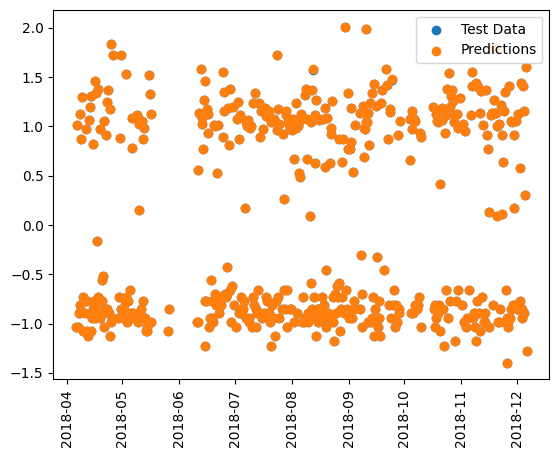

In [51]:
plt.xticks(rotation=90)
plt.scatter(x=time, y=y_test)
plt.scatter(x=time1, y=predictions)
classes = ['Test Data', 'Predictions']
plt.legend(labels=classes)
plt.show()

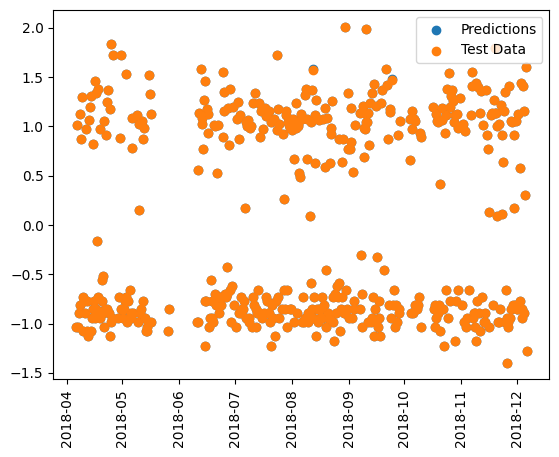

In [52]:
plt.xticks(rotation=90)

plt.scatter(x=time1, y=predictions)
plt.scatter(x=time, y=y_test)
classes = ['Predictions','Test Data']
plt.legend(labels=classes)
plt.show()